In [30]:
import pandas as pd

url = "https://gist.githubusercontent.com/guilhermesilveira/12291c548acaf544596795709020e3db/raw/325bdef098bd9cbc2189215b7e32e22f437f29f3/projetos.csv"
df = pd.read_csv(url)
df.head()

,nao_finalizado,horas_esperadas,preco
0,0,75.0,6985.000000
1,1,0.0,4325.293458
2,0,87.0,14205.000000
3,1,13.0,100.000000
4,0,2.0,202.000000


In [31]:
df['finalizado'] = df['nao_finalizado'].map({1: 0, 0: 1})
df.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.000000,1
1,1,0.0,4325.293458,0
2,0,87.0,14205.000000,1
3,1,13.0,100.000000,0
4,0,2.0,202.000000,1


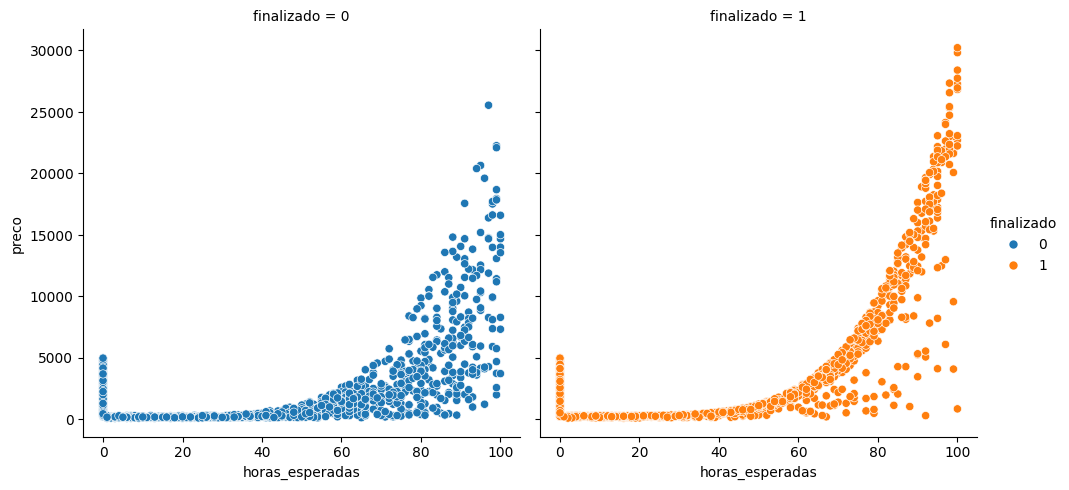

In [32]:
import seaborn as sns

sns.relplot(x='horas_esperadas', y='preco', data=df, hue='finalizado', col='finalizado')

In [33]:
df.query('horas_esperadas > 0')
df.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.000000,1
1,1,0.0,4325.293458,0
2,0,87.0,14205.000000,1
3,1,13.0,100.000000,0
4,0,2.0,202.000000,1


In [34]:
x = df[['horas_esperadas', 'preco']]
y = df['finalizado']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = SEED, stratify=y)

print(f"Treinaremos com {len(train_x)} elementos")
print(f"Testaremos com {len(test_x)} elementos")

model = LinearSVC()
model.fit(train_x, train_y)
accuracy = accuracy_score(test_y, model.predict(test_x)) * 100
print(f"A acurácia foi de {accuracy:.2f}%")

Treinaremos com 1842 elementos
Testaremos com 615 elementos
A acurácia foi de 56.10%


In [36]:
predic = test_y.sum() / len(test_y) * 100
print(f"A acurácia do modelo de base foi de {predic:.2f}%")

A acurácia do modelo de base foi de 52.52%
